<div style="background-color:#9dedde; padding: 20px">
<h2>Projet 7 : Implémentez un modèle de Scoring</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly import tools
import plotly.express as px
from datetime import datetime
import datetime

# pd.set_option('display.max_columns', 200)
# pd.set_option('display.max_rows', 1000)

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>Chargement des données</b>
    </h2>
</div>


In [2]:
df = pd.read_csv("D:\\Projet\\P07\\P07_Implementez_outils_scoring\\p7-ml\\fichier_ml\\app_train_sample_clean.csv")

In [3]:
df.shape

(11078, 39)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11078 entries, 0 to 11077
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID_CLIENT                     11078 non-null  int64  
 1   CIBLE                         11078 non-null  int64  
 2   TYPE_CONTRAT                  11078 non-null  object 
 3   GENRE                         11078 non-null  object 
 4   PROPRIETAIRE_VOITURE          11078 non-null  object 
 5   PROPRIETAIRE_BIEN_IMMO        11078 non-null  object 
 6   NBR_ENFANTS                   11078 non-null  int64  
 7   REVENU_TOTAL                  11078 non-null  float64
 8   MONTANT_CREDIT                11078 non-null  float64
 9   MONTANT_ANNUITE               11078 non-null  float64
 10  MONTANT_BIENS                 11078 non-null  float64
 11  TYPE_REVENUS                  11078 non-null  object 
 12  NIVEAU_EDUCATION              11078 non-null  object 
 13  S

In [5]:
df.dtypes

ID_CLIENT                         int64
CIBLE                             int64
TYPE_CONTRAT                     object
GENRE                            object
PROPRIETAIRE_VOITURE             object
PROPRIETAIRE_BIEN_IMMO           object
NBR_ENFANTS                       int64
REVENU_TOTAL                    float64
MONTANT_CREDIT                  float64
MONTANT_ANNUITE                 float64
MONTANT_BIENS                   float64
TYPE_REVENUS                     object
NIVEAU_EDUCATION                 object
STATUT_FAMILIAL                  object
TYPE_LOGEMENT                    object
JOURS_ENREGISTREMENT            float64
JOURS_ID_PUBLICATION              int64
FLAG_MOBILE                       int64
FLAG_TELEPHONE_PRO                int64
FLAG_TELEPHONE_TRAVAIL            int64
FLAG_TELEPHONE                    int64
FLAG_EMAIL                        int64
NBR_MEMBRES_FAMILLE             float64
SOURCE_EXTERNE_2                float64
JOURS_DERNIER_CHANGEMENT_TEL    float64


In [6]:
df.tail()

,ID_CLIENT,CIBLE,TYPE_CONTRAT,GENRE,PROPRIETAIRE_VOITURE,PROPRIETAIRE_BIEN_IMMO,NBR_ENFANTS,REVENU_TOTAL,MONTANT_CREDIT,MONTANT_ANNUITE,...,ACCOMPAGNANT_DEMANDE,AGE,ANNEES_EMPLOI,SCORE_CONTACT,RATIO_ENFANTS_FAMILLE,DUREE_CREDIT_MOIS,DELAI_TRAITEMENT_DOSSIER,TRAITEMENT_DOSSIER_GROUPE,TRAITEMENT_DOSSIER_SIMPLIFIE,EMPLOI_TYPE
11073,303340,0,Cash loans,F,N,N,1,225000.0,367389.0,16312.5,...,Family,43.0,4,1,0.333333,23.0,2849.0,120j+,Long,Expérience Faible
11074,150906,0,Cash loans,F,N,Y,0,103500.0,121500.0,9211.5,...,Unaccompanied,60.2,0,1,0.000000,13.0,1857.0,120j+,Long,Retraité
11075,151728,1,Cash loans,M,N,Y,0,40500.0,85500.0,9108.0,...,Unaccompanied,37.8,20,3,0.000000,9.0,7.0,<15j,Court,Expérience Longue
11076,384640,0,Revolving loans,F,Y,Y,0,69750.0,247500.0,12375.0,...,Family,43.4,0,0,0.000000,20.0,1482.0,120j+,Long,Retraité
11077,437079,0,Cash loans,F,N,Y,0,36000.0,270000.0,9828.0,...,Unaccompanied,60.3,0,1,0.000000,27.0,0.0,<15j,Court,Retraité


In [7]:
df.head()

,ID_CLIENT,CIBLE,TYPE_CONTRAT,GENRE,PROPRIETAIRE_VOITURE,PROPRIETAIRE_BIEN_IMMO,NBR_ENFANTS,REVENU_TOTAL,MONTANT_CREDIT,MONTANT_ANNUITE,...,ACCOMPAGNANT_DEMANDE,AGE,ANNEES_EMPLOI,SCORE_CONTACT,RATIO_ENFANTS_FAMILLE,DUREE_CREDIT_MOIS,DELAI_TRAITEMENT_DOSSIER,TRAITEMENT_DOSSIER_GROUPE,TRAITEMENT_DOSSIER_SIMPLIFIE,EMPLOI_TYPE
0,101392,0,Cash loans,F,Y,Y,0,81000.0,573628.5,24435.0,...,Unaccompanied,54.3,2,1,0.000000,23.0,2343.0,120j+,Long,Expérience Faible
1,435135,0,Cash loans,F,N,N,0,112500.0,298512.0,19948.5,...,Unaccompanied,25.2,2,2,0.000000,15.0,87.0,60-120j,Long,Expérience Faible
2,341153,1,Cash loans,F,N,Y,0,90000.0,1006920.0,42790.5,...,Unaccompanied,44.0,0,1,0.000000,24.0,3806.0,120j+,Long,Sans emploi
3,401501,0,Cash loans,M,Y,Y,1,180000.0,364896.0,31347.0,...,Unaccompanied,37.6,14,1,0.333333,12.0,1751.0,120j+,Long,Expérience Moyenne
4,341989,0,Revolving loans,F,N,Y,1,135000.0,405000.0,20250.0,...,Unaccompanied,31.5,4,1,0.333333,20.0,1782.0,120j+,Long,Expérience Faible


<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b> Analyse Exploratoire ---- Features numériques</b>
    </h2>
</div>


In [8]:
numeric_columns = df.select_dtypes(include=np.number)

<Axes: >

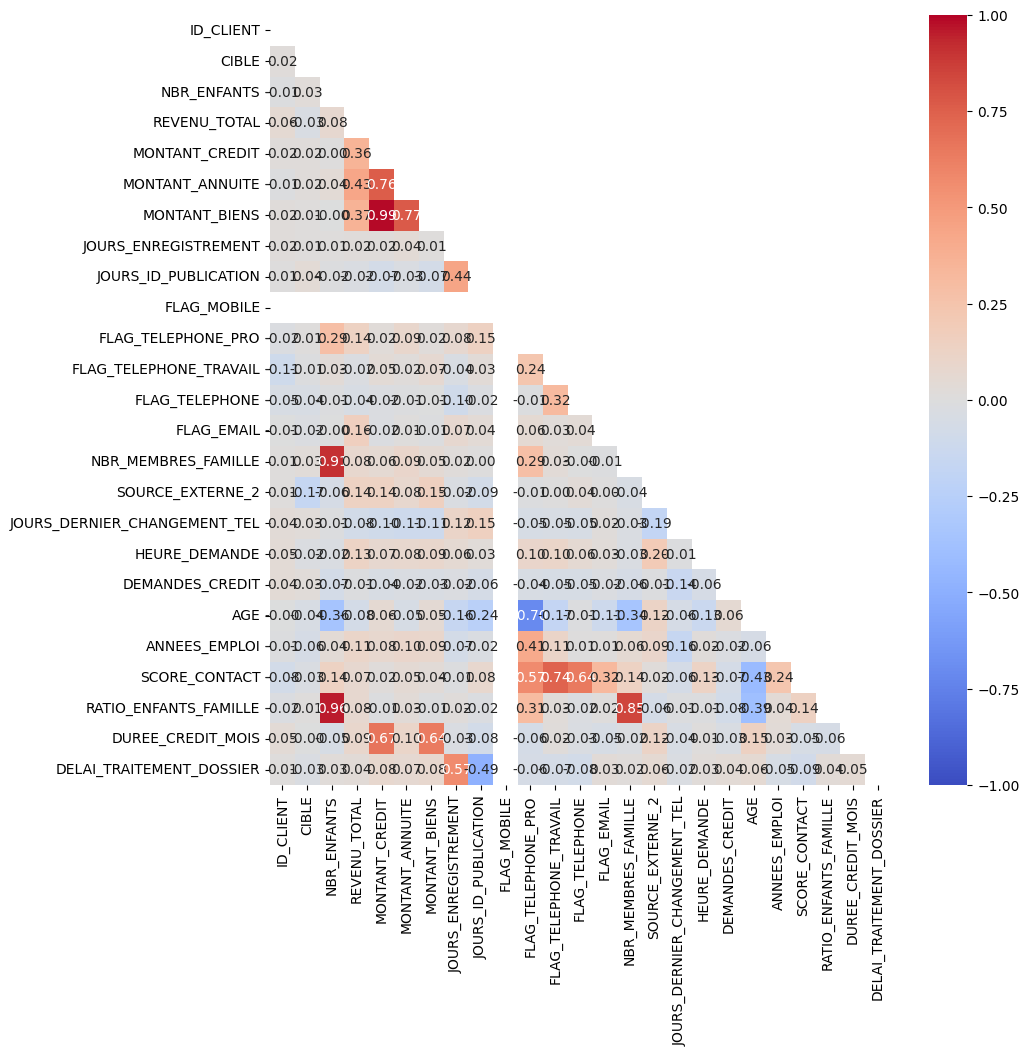

In [9]:
fig = plt.subplots(1, 1, figsize=(10, 10))
corr = numeric_columns.sample(frac=0.1).corr()
mask = np.triu(corr)
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, mask=mask, fmt=".2f")

In [10]:
df.CIBLE.value_counts()

CIBLE
0    10183
1      895
Name: count, dtype: int64

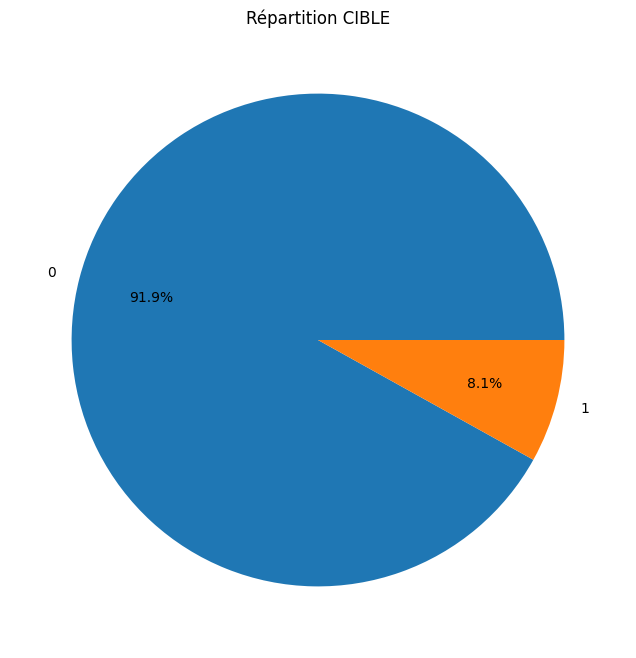

In [11]:
note_pie = df["CIBLE"].value_counts()

plt.figure(figsize=(12, 8))
plt.pie(note_pie, labels=note_pie.index, autopct="%1.1f%%", pctdistance=0.7)
plt.title("Répartition CIBLE")
plt.show()

<div style="background-color:#a2f5aa; padding: 1px; max-width: 350px;">
    <h2>
        <b> Relation Cible x Age</b>
    </h2>
</div>


C:\Users\acer6\AppData\Local\Temp\ipykernel_35552\2408682498.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



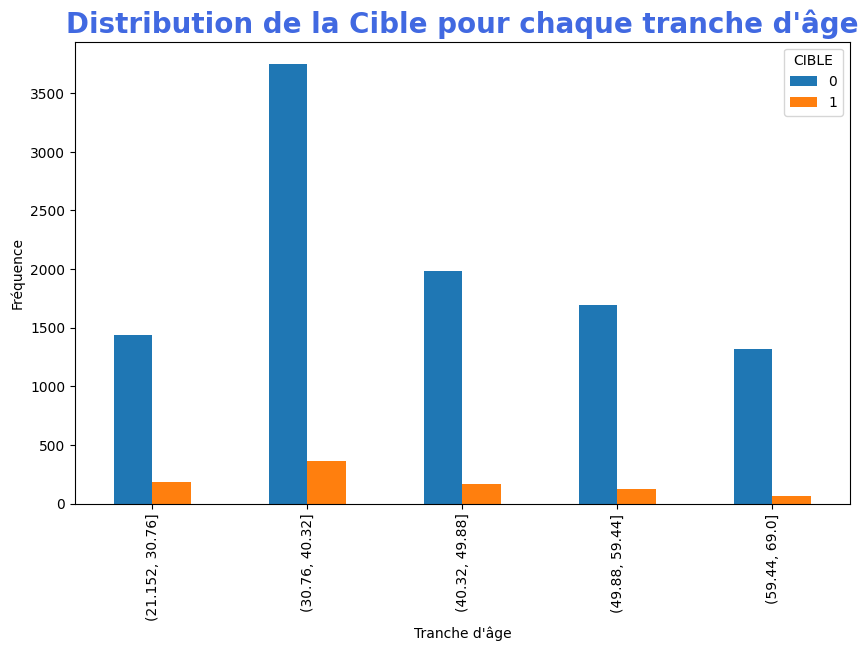

In [12]:
age_group_cible = df.groupby([pd.cut(df["AGE"], bins=5), "CIBLE"]).size().unstack()

age_group_cible.plot(kind="bar", stacked=False, figsize=(10, 6))
plt.xlabel("Tranche d'âge")
plt.ylabel("Fréquence")
plt.title(
    "Distribution de la Cible pour chaque tranche d'âge",
    fontsize=20,
    fontweight="bold",
    color="RoyalBlue",
)
plt.legend(title="CIBLE", labels=["0", "1"])
plt.show()

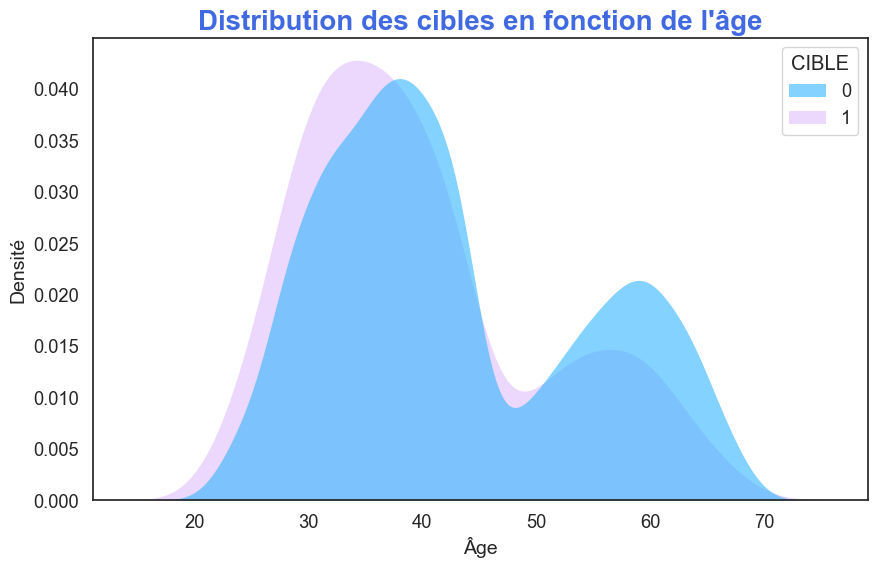

In [13]:
custom_colors = ["#33b4ff", "#debefa"]  # Définir des couleurs personnalisées


sns.set(style="white", palette=custom_colors, font_scale=1.2)


plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df, x="AGE", hue="CIBLE", fill=True, common_norm=False, alpha=0.6, linewidth=0
)
plt.xlabel("Âge", fontsize=14)
plt.ylabel("Densité", fontsize=14)
plt.title(
    "Distribution des cibles en fonction de l'âge",
    fontsize=20,
    fontweight="bold",
    color="RoyalBlue",
)
plt.grid(False)  # Retirer la grille
plt.show()

<div style="background-color:#a2f5aa; padding: 1px; max-width: 600px;">
    <h2>
        <b> Relation Cible x Nombre membre de la famille</b>
    </h2>
</div>


In [14]:
df.columns.tolist()

['ID_CLIENT',
 'CIBLE',
 'TYPE_CONTRAT',
 'GENRE',
 'PROPRIETAIRE_VOITURE',
 'PROPRIETAIRE_BIEN_IMMO',
 'NBR_ENFANTS',
 'REVENU_TOTAL',
 'MONTANT_CREDIT',
 'MONTANT_ANNUITE',
 'MONTANT_BIENS',
 'TYPE_REVENUS',
 'NIVEAU_EDUCATION',
 'STATUT_FAMILIAL',
 'TYPE_LOGEMENT',
 'JOURS_ENREGISTREMENT',
 'JOURS_ID_PUBLICATION',
 'FLAG_MOBILE',
 'FLAG_TELEPHONE_PRO',
 'FLAG_TELEPHONE_TRAVAIL',
 'FLAG_TELEPHONE',
 'FLAG_EMAIL',
 'NBR_MEMBRES_FAMILLE',
 'SOURCE_EXTERNE_2',
 'JOURS_DERNIER_CHANGEMENT_TEL',
 'TYPE_ENTREPRISE',
 'HEURE_DEMANDE',
 'JOUR_DEMANDE',
 'DEMANDES_CREDIT',
 'ACCOMPAGNANT_DEMANDE',
 'AGE',
 'ANNEES_EMPLOI',
 'SCORE_CONTACT',
 'RATIO_ENFANTS_FAMILLE',
 'DUREE_CREDIT_MOIS',
 'DELAI_TRAITEMENT_DOSSIER',
 'TRAITEMENT_DOSSIER_GROUPE',
 'TRAITEMENT_DOSSIER_SIMPLIFIE',
 'EMPLOI_TYPE']

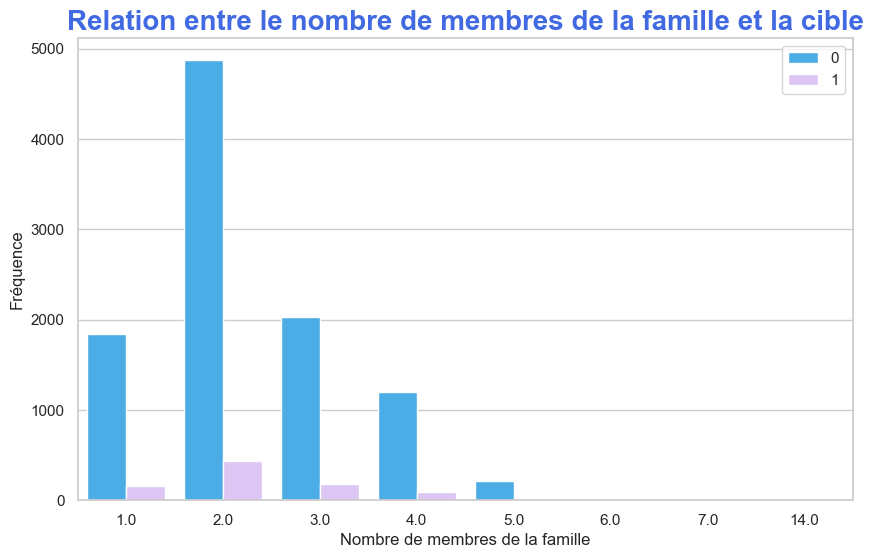

In [15]:
# Définition de la palette de couleurs personnalisée
custom_palette = ["#33b4ff", "#debefa"]

# Paramètres de style pour personnaliser le graphique
sns.set(style="whitegrid")

# Tracer le graphique catégoriel
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="NBR_MEMBRES_FAMILLE", hue="CIBLE", data=df, palette=custom_palette)

# Ajouter des titres et des étiquettes
plt.xlabel("Nombre de membres de la famille")
plt.ylabel("Fréquence")
plt.title(
    "Relation entre le nombre de membres de la famille et la cible",
    fontsize=20,
    fontweight="bold",
    color="RoyalBlue",
)
plt.legend(loc="upper right")
# Afficher le graphique
plt.show()

<div style="background-color:#a2f5aa; padding: 1px; max-width: 350px;">
    <h2>
        <b> Relation Cible x Total Credit</b>
    </h2>
</div>


In [16]:
df.columns.tolist()

['ID_CLIENT',
 'CIBLE',
 'TYPE_CONTRAT',
 'GENRE',
 'PROPRIETAIRE_VOITURE',
 'PROPRIETAIRE_BIEN_IMMO',
 'NBR_ENFANTS',
 'REVENU_TOTAL',
 'MONTANT_CREDIT',
 'MONTANT_ANNUITE',
 'MONTANT_BIENS',
 'TYPE_REVENUS',
 'NIVEAU_EDUCATION',
 'STATUT_FAMILIAL',
 'TYPE_LOGEMENT',
 'JOURS_ENREGISTREMENT',
 'JOURS_ID_PUBLICATION',
 'FLAG_MOBILE',
 'FLAG_TELEPHONE_PRO',
 'FLAG_TELEPHONE_TRAVAIL',
 'FLAG_TELEPHONE',
 'FLAG_EMAIL',
 'NBR_MEMBRES_FAMILLE',
 'SOURCE_EXTERNE_2',
 'JOURS_DERNIER_CHANGEMENT_TEL',
 'TYPE_ENTREPRISE',
 'HEURE_DEMANDE',
 'JOUR_DEMANDE',
 'DEMANDES_CREDIT',
 'ACCOMPAGNANT_DEMANDE',
 'AGE',
 'ANNEES_EMPLOI',
 'SCORE_CONTACT',
 'RATIO_ENFANTS_FAMILLE',
 'DUREE_CREDIT_MOIS',
 'DELAI_TRAITEMENT_DOSSIER',
 'TRAITEMENT_DOSSIER_GROUPE',
 'TRAITEMENT_DOSSIER_SIMPLIFIE',
 'EMPLOI_TYPE']

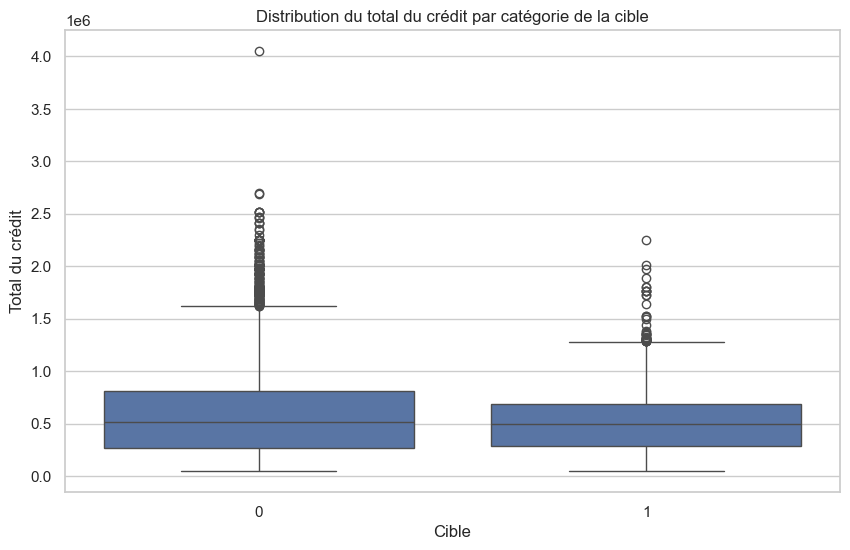

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="CIBLE", y="MONTANT_CREDIT", data=df)
plt.title("Distribution du total du crédit par catégorie de la cible")
plt.xlabel("Cible")
plt.ylabel("Total du crédit")
plt.show()

In [18]:
df["MONTANT_CREDIT"].describe().T

count    1.107800e+04
mean     6.010771e+05
std      4.051237e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.123385e+05
75%      8.086500e+05
max      4.050000e+06
Name: MONTANT_CREDIT, dtype: float64

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b> Analyse Exploratoire ---- Features catégorielles</b>
    </h2>
</div>


<div style="background-color:#a2f5aa; padding: 1px; max-width: 350px;">
    <h2>
        <b> Relation Cible x Biens immo</b>
    </h2>
</div>


In [19]:
df.columns

Index(['ID_CLIENT', 'CIBLE', 'TYPE_CONTRAT', 'GENRE', 'PROPRIETAIRE_VOITURE',
       'PROPRIETAIRE_BIEN_IMMO', 'NBR_ENFANTS', 'REVENU_TOTAL',
       'MONTANT_CREDIT', 'MONTANT_ANNUITE', 'MONTANT_BIENS', 'TYPE_REVENUS',
       'NIVEAU_EDUCATION', 'STATUT_FAMILIAL', 'TYPE_LOGEMENT',
       'JOURS_ENREGISTREMENT', 'JOURS_ID_PUBLICATION', 'FLAG_MOBILE',
       'FLAG_TELEPHONE_PRO', 'FLAG_TELEPHONE_TRAVAIL', 'FLAG_TELEPHONE',
       'FLAG_EMAIL', 'NBR_MEMBRES_FAMILLE', 'SOURCE_EXTERNE_2',
       'JOURS_DERNIER_CHANGEMENT_TEL', 'TYPE_ENTREPRISE', 'HEURE_DEMANDE',
       'JOUR_DEMANDE', 'DEMANDES_CREDIT', 'ACCOMPAGNANT_DEMANDE', 'AGE',
       'ANNEES_EMPLOI', 'SCORE_CONTACT', 'RATIO_ENFANTS_FAMILLE',
       'DUREE_CREDIT_MOIS', 'DELAI_TRAITEMENT_DOSSIER',
       'TRAITEMENT_DOSSIER_GROUPE', 'TRAITEMENT_DOSSIER_SIMPLIFIE',
       'EMPLOI_TYPE'],
      dtype='object')

C:\Users\acer6\AppData\Local\Temp\ipykernel_35552\2802182120.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




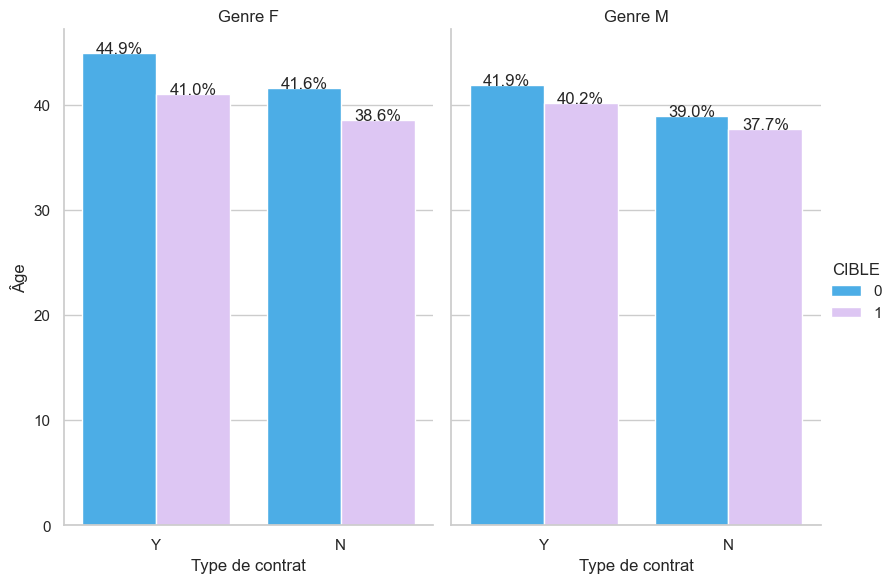

In [20]:
custom_palette = ["#33b4ff", "#debefa"]

sns.set(style="whitegrid")

g = sns.catplot(
    x="PROPRIETAIRE_BIEN_IMMO",
    y="AGE",
    hue="CIBLE",
    col="GENRE",
    data=df,
    kind="bar",
    ci=None,
    palette=custom_palette,
    height=6,
    aspect=0.7,
)

g.set_axis_labels("Type de contrat", "Âge")
g.set_titles("Genre {col_name}")

for ax in g.axes.flat:
    for p in ax.patches:
        if p.get_height() > 0:
            height = p.get_height()
            ax.text(
                p.get_x() + p.get_width() / 2.0,
                height,
                "{:.1f}%".format(height),
                ha="center",
            )

plt.show()

<div style="background-color:#a2f5aa; padding: 1px; max-width: 350px;">
    <h2>
        <b> Relation Age x ANNEE TRAVAILLE</b>
    </h2>
</div>


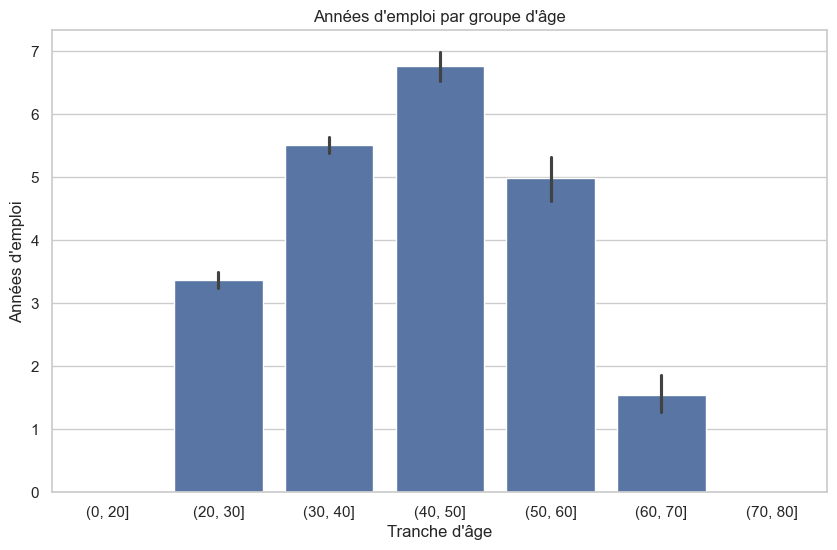

In [21]:
# Diagramme à barres de 'YEARS_EMPLOYED' par groupe d'âge
df['TRANCHE_AGE'] = pd.cut(df['AGE'], bins=[0, 20, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(10, 6))
sns.barplot(x='TRANCHE_AGE', y='ANNEES_EMPLOI', data=df)
plt.title('Années d\'emploi par groupe d\'âge')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Années d\'emploi')
plt.show()

<div style="background-color:#a2f5aa; padding: 1px; max-width: 300px;">
    <h2>
        <b>Relation Cible x Voiture</b>
    </h2>
</div>


C:\Users\acer6\AppData\Local\Temp\ipykernel_35552\2611014336.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




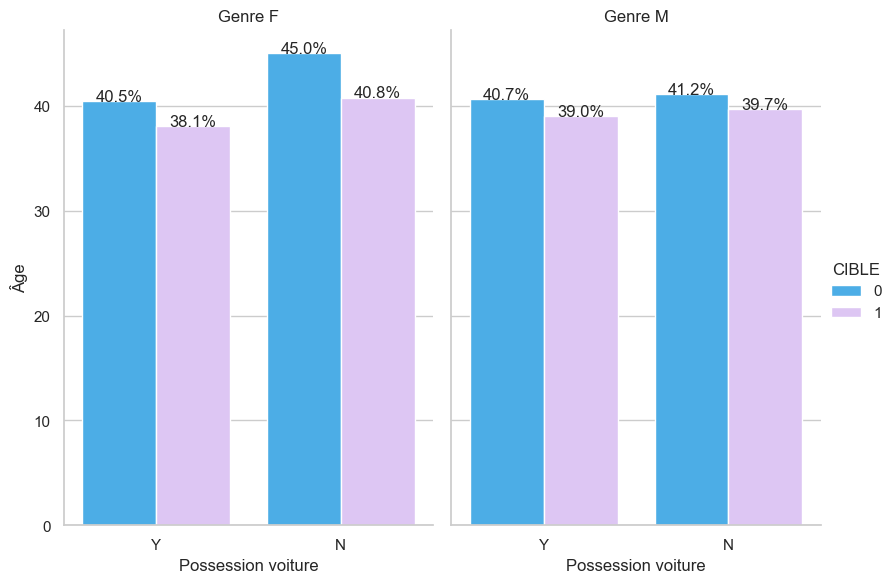

In [22]:
custom_palette = ["#33b4ff", "#debefa"]

sns.set(style="whitegrid")

g = sns.catplot(
    x="PROPRIETAIRE_VOITURE",
    y="AGE",
    hue="CIBLE",
    col="GENRE",
    data=df,
    kind="bar",
    ci=None,
    palette=custom_palette,
    height=6,
    aspect=0.7,
)

g.set_axis_labels("Possession voiture", "Âge")
g.set_titles("Genre {col_name}")

for ax in g.axes.flat:
    for p in ax.patches:
        if p.get_height() > 0:
            height = p.get_height()
            ax.text(
                p.get_x() + p.get_width() / 2.0,
                height,
                "{:.1f}%".format(height),
                ha="center",
            )

plt.show()

<div style="background-color:#a2f5aa; padding: 1px; max-width: 500px;">
    <h2>
        <b>Relation Cible x Type de Contrat x Genre</b>
    </h2>
</div>


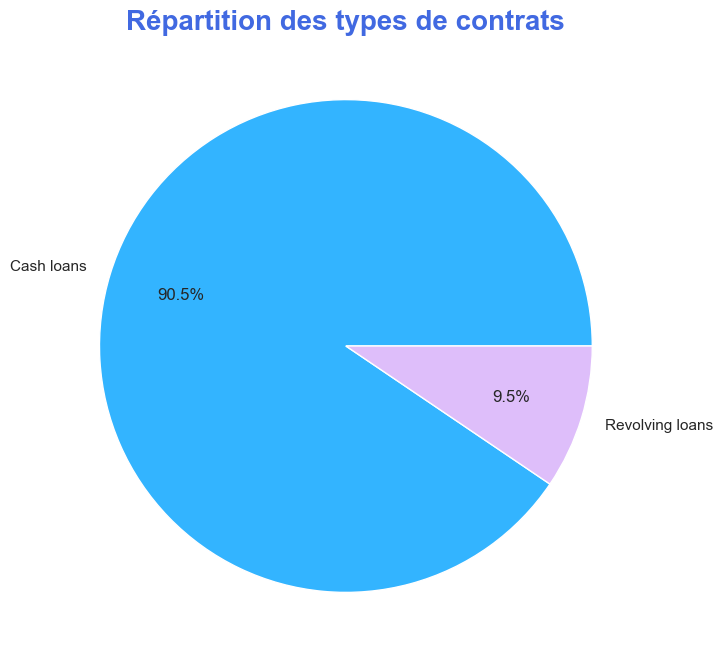

In [23]:
custom_palette = ["#33b4ff", "#debefa"]
note_pie = df["TYPE_CONTRAT"].value_counts()

plt.figure(figsize=(12, 8))
plt.pie(
    note_pie,
    labels=note_pie.index,
    colors=custom_palette,
    autopct="%1.1f%%",
    pctdistance=0.7,
)
plt.title(
    "Répartition des types de contrats",
    fontsize=20,
    fontweight="bold",
    color="RoyalBlue",
)
plt.show()

C:\Users\acer6\AppData\Local\Temp\ipykernel_35552\3226085150.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




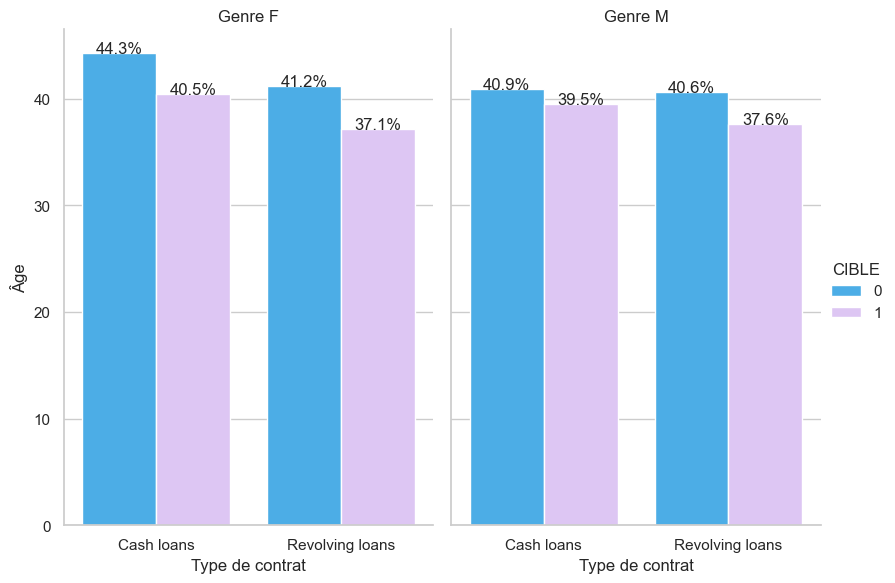

In [24]:
custom_palette = ["#33b4ff", "#debefa"]

sns.set(style="whitegrid")

g = sns.catplot(
    x="TYPE_CONTRAT",
    y="AGE",
    hue="CIBLE",
    col="GENRE",
    data=df,
    kind="bar",
    ci=None,
    palette=custom_palette,
    height=6,
    aspect=0.7,
)

g.set_axis_labels("Type de contrat", "Âge")
g.set_titles("Genre {col_name}")

for ax in g.axes.flat:
    for p in ax.patches:
        if p.get_height() > 0:
            height = p.get_height()
            ax.text(
                p.get_x() + p.get_width() / 2.0,
                height,
                "{:.1f}%".format(height),
                ha="center",
            )

plt.show()

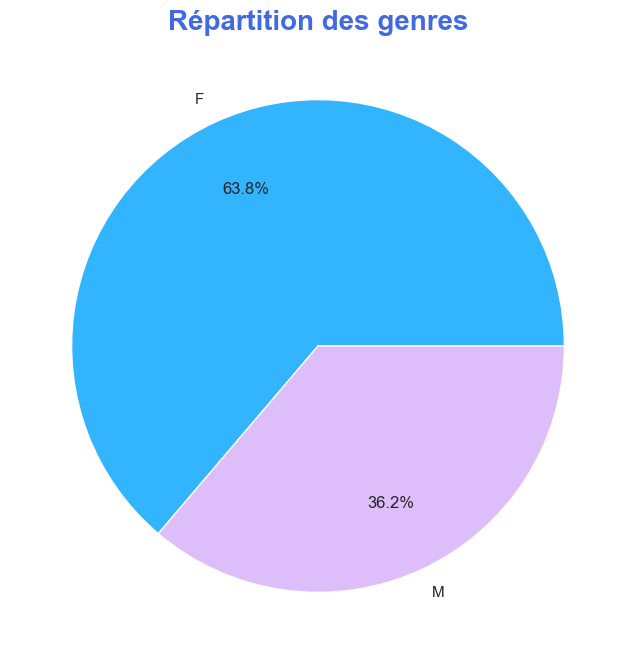

In [25]:
custom_palette = ["#33b4ff", "#debefa"]
note_pie = df["GENRE"].value_counts()

plt.figure(figsize=(12, 8))
plt.pie(
    note_pie,
    labels=note_pie.index,
    colors=custom_palette,
    autopct="%1.1f%%",
    pctdistance=0.7,
)
plt.title("Répartition des genres", fontsize=20, fontweight="bold", color="RoyalBlue")
plt.show()

In [26]:
df["GENRE"].value_counts()

GENRE
F    7065
M    4013
Name: count, dtype: int64

In [27]:
df = df[df["GENRE"] != "XNA"]

<Figure size 1000x1000 with 0 Axes>

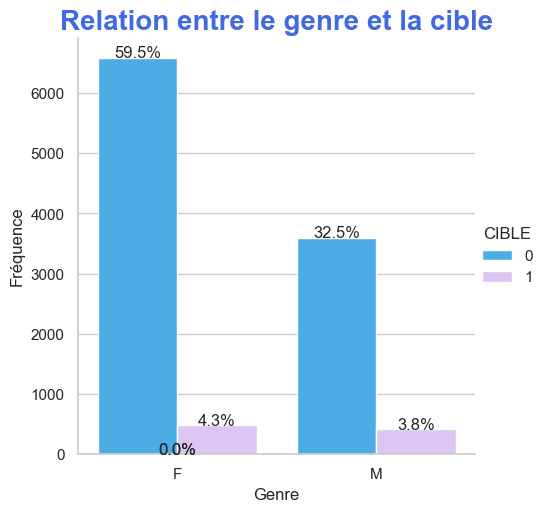

In [28]:
# Définition de la palette de couleurs personnalisée
custom_palette = ["#33b4ff", "#debefa"]

# Paramètres de style pour personnaliser le graphique
sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))

# Tracer le graphique catégoriel
ax = sns.catplot(x="GENRE", hue="CIBLE", data=df, kind="count", palette=custom_palette)

total = float(len(df))
for p in ax.ax.patches:
    height = p.get_height()
    ax.ax.text(
        p.get_x() + p.get_width() / 2.0,
        height + 3,
        "{:.1f}%".format((height / total) * 100),
        ha="center",
    )

# Ajouter des titres et des étiquettes
plt.xlabel("Genre")
plt.ylabel("Fréquence")
plt.title(
    "Relation entre le genre et la cible",
    fontsize=20,
    fontweight="bold",
    color="RoyalBlue",
)


# Afficher le graphique
plt.show()

<div style="background-color:#a2f5aa; padding: 1px; max-width: 800px;">
    <h2>
        <b>Relation Cible x Satut familial</b>
    </h2>
</div>


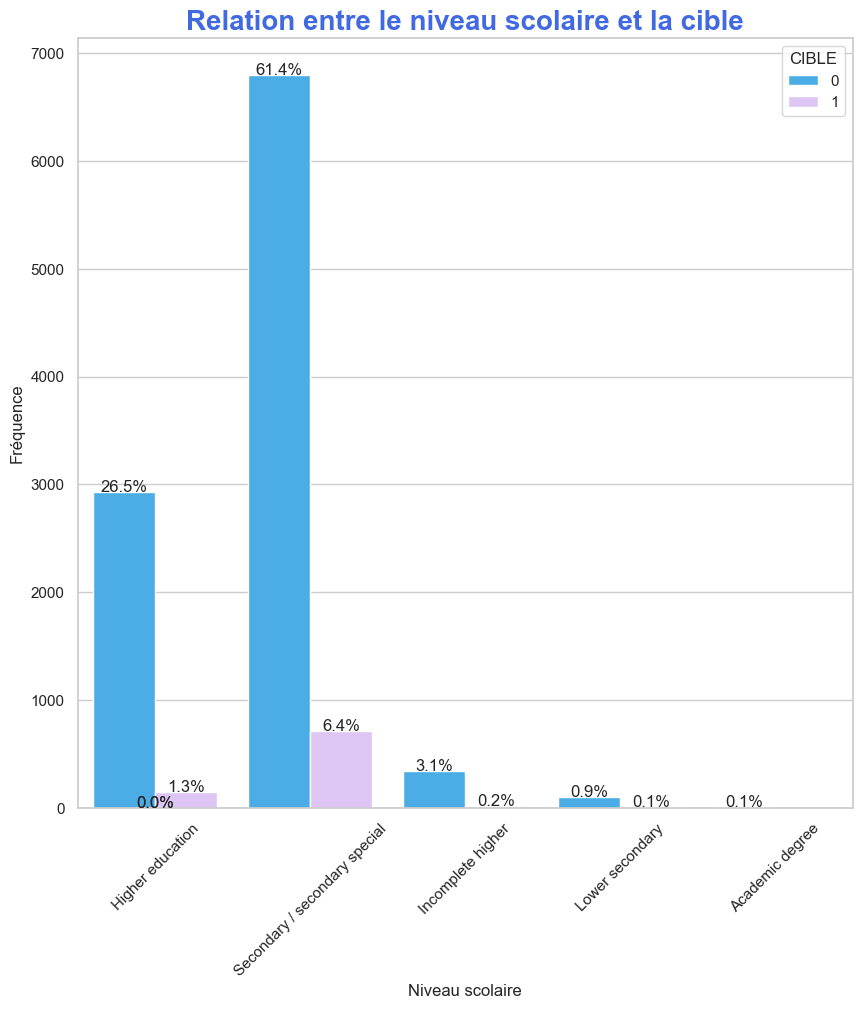

In [29]:
# Définition de la palette de couleurs personnalisée
custom_palette = ["#33b4ff", "#debefa"]

# Paramètres de style pour personnaliser le graphique
sns.set(style="whitegrid")

# Tracer le graphique catégoriel
plt.figure(figsize=(10, 10))
ax = sns.countplot(x="NIVEAU_EDUCATION", hue="CIBLE", data=df, palette=custom_palette)

total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.0,
        height + 3,
        "{:.1f}%".format((height / total) * 100),
        ha="center",
    )

# Ajouter des titres et des étiquettes
plt.xlabel("Niveau scolaire")
plt.ylabel("Fréquence")
plt.title(
    "Relation entre le niveau scolaire et la cible",
    fontsize=20,
    fontweight="bold",
    color="RoyalBlue",
)
plt.xticks(rotation=45)
# Afficher le graphique
plt.show()

<div style="background-color:#a2f5aa; padding: 1px; max-width: 800px;">
    <h2>
        <b>Relation Cible x Type de revenus</b>
    </h2>
</div>


In [30]:
df["TYPE_REVENUS"].value_counts()

TYPE_REVENUS
Working                 5930
Commercial associate    2420
Pensioner               1889
State servant            837
Unemployed                 2
Name: count, dtype: int64

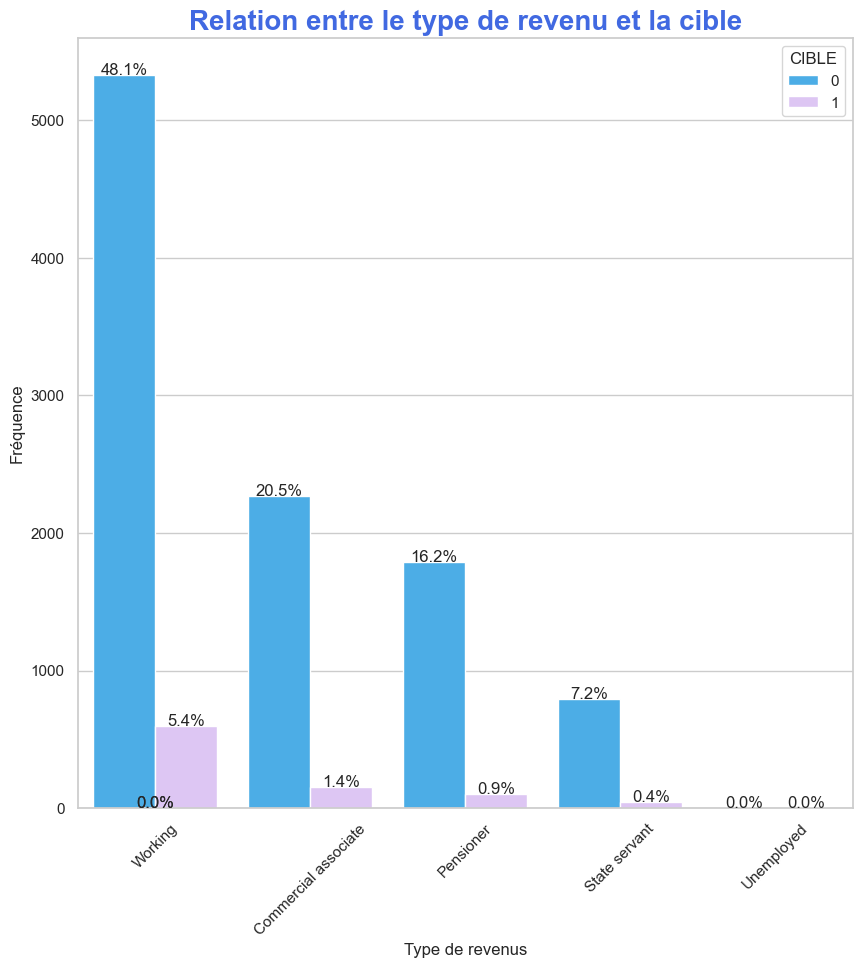

In [31]:
# Définition de la palette de couleurs personnalisée
custom_palette = ["#33b4ff", "#debefa"]

# Paramètres de style pour personnaliser le graphique
sns.set(style="whitegrid")

# Tracer le graphique catégoriel
plt.figure(figsize=(10, 10))
ax = sns.countplot(x="TYPE_REVENUS", hue="CIBLE", data=df, palette=custom_palette)

total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.0,
        height + 3,
        "{:.1f}%".format((height / total) * 100),
        ha="center",
    )

# Ajouter des titres et des étiquettes
plt.xlabel("Type de revenus")
plt.ylabel("Fréquence")
plt.title(
    "Relation entre le type de revenu et la cible",
    fontsize=20,
    fontweight="bold",
    color="RoyalBlue",
)
plt.xticks(rotation=45)
# Afficher le graphique
plt.show()

In [32]:
df.columns.tolist()

['ID_CLIENT',
 'CIBLE',
 'TYPE_CONTRAT',
 'GENRE',
 'PROPRIETAIRE_VOITURE',
 'PROPRIETAIRE_BIEN_IMMO',
 'NBR_ENFANTS',
 'REVENU_TOTAL',
 'MONTANT_CREDIT',
 'MONTANT_ANNUITE',
 'MONTANT_BIENS',
 'TYPE_REVENUS',
 'NIVEAU_EDUCATION',
 'STATUT_FAMILIAL',
 'TYPE_LOGEMENT',
 'JOURS_ENREGISTREMENT',
 'JOURS_ID_PUBLICATION',
 'FLAG_MOBILE',
 'FLAG_TELEPHONE_PRO',
 'FLAG_TELEPHONE_TRAVAIL',
 'FLAG_TELEPHONE',
 'FLAG_EMAIL',
 'NBR_MEMBRES_FAMILLE',
 'SOURCE_EXTERNE_2',
 'JOURS_DERNIER_CHANGEMENT_TEL',
 'TYPE_ENTREPRISE',
 'HEURE_DEMANDE',
 'JOUR_DEMANDE',
 'DEMANDES_CREDIT',
 'ACCOMPAGNANT_DEMANDE',
 'AGE',
 'ANNEES_EMPLOI',
 'SCORE_CONTACT',
 'RATIO_ENFANTS_FAMILLE',
 'DUREE_CREDIT_MOIS',
 'DELAI_TRAITEMENT_DOSSIER',
 'TRAITEMENT_DOSSIER_GROUPE',
 'TRAITEMENT_DOSSIER_SIMPLIFIE',
 'EMPLOI_TYPE',
 'TRANCHE_AGE']

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b> Préparation données pour modélisation</b>
    </h2>
</div>


Traitement des variables catégorielles

In [33]:
df.dtypes

ID_CLIENT                          int64
CIBLE                              int64
TYPE_CONTRAT                      object
GENRE                             object
PROPRIETAIRE_VOITURE              object
PROPRIETAIRE_BIEN_IMMO            object
NBR_ENFANTS                        int64
REVENU_TOTAL                     float64
MONTANT_CREDIT                   float64
MONTANT_ANNUITE                  float64
MONTANT_BIENS                    float64
TYPE_REVENUS                      object
NIVEAU_EDUCATION                  object
STATUT_FAMILIAL                   object
TYPE_LOGEMENT                     object
JOURS_ENREGISTREMENT             float64
JOURS_ID_PUBLICATION               int64
FLAG_MOBILE                        int64
FLAG_TELEPHONE_PRO                 int64
FLAG_TELEPHONE_TRAVAIL             int64
FLAG_TELEPHONE                     int64
FLAG_EMAIL                         int64
NBR_MEMBRES_FAMILLE              float64
SOURCE_EXTERNE_2                 float64
JOURS_DERNIER_CH

In [34]:
df.drop(columns=['TRANCHE_AGE'], inplace=True)


In [35]:
liste = df.select_dtypes(include='object').columns.to_list()
print("nombre de variables catégorielle :", len(liste), end="\n")
liste

nombre de variables catégorielle : 14


['TYPE_CONTRAT',
 'GENRE',
 'PROPRIETAIRE_VOITURE',
 'PROPRIETAIRE_BIEN_IMMO',
 'TYPE_REVENUS',
 'NIVEAU_EDUCATION',
 'STATUT_FAMILIAL',
 'TYPE_LOGEMENT',
 'TYPE_ENTREPRISE',
 'JOUR_DEMANDE',
 'ACCOMPAGNANT_DEMANDE',
 'TRAITEMENT_DOSSIER_GROUPE',
 'TRAITEMENT_DOSSIER_SIMPLIFIE',
 'EMPLOI_TYPE']

In [36]:
col_cat = ['TYPE_CONTRAT',
 'STATUT_FAMILIAL','PROPRIETAIRE_BIEN_IMMO',
 'TYPE_REVENUS',
 'GENRE',
 'NIVEAU_EDUCATION',
 'PROPRIETAIRE_VOITURE']


# Afficher les valeurs uniques pour chaque colonne
for col in col_cat:
    print(col, df[col].unique())

TYPE_CONTRAT ['Cash loans' 'Revolving loans']
STATUT_FAMILIAL ['Civil marriage' 'Single / not married' 'Married' 'Widow' 'Separated']
PROPRIETAIRE_BIEN_IMMO ['Y' 'N']
TYPE_REVENUS ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Unemployed']
GENRE ['F' 'M']
NIVEAU_EDUCATION ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
PROPRIETAIRE_VOITURE ['Y' 'N']


In [37]:
df[col_cat].isna().mean().round(2)

TYPE_CONTRAT              0.0
STATUT_FAMILIAL           0.0
PROPRIETAIRE_BIEN_IMMO    0.0
TYPE_REVENUS              0.0
GENRE                     0.0
NIVEAU_EDUCATION          0.0
PROPRIETAIRE_VOITURE      0.0
dtype: float64

In [38]:
df.dtypes

ID_CLIENT                         int64
CIBLE                             int64
TYPE_CONTRAT                     object
GENRE                            object
PROPRIETAIRE_VOITURE             object
PROPRIETAIRE_BIEN_IMMO           object
NBR_ENFANTS                       int64
REVENU_TOTAL                    float64
MONTANT_CREDIT                  float64
MONTANT_ANNUITE                 float64
MONTANT_BIENS                   float64
TYPE_REVENUS                     object
NIVEAU_EDUCATION                 object
STATUT_FAMILIAL                  object
TYPE_LOGEMENT                    object
JOURS_ENREGISTREMENT            float64
JOURS_ID_PUBLICATION              int64
FLAG_MOBILE                       int64
FLAG_TELEPHONE_PRO                int64
FLAG_TELEPHONE_TRAVAIL            int64
FLAG_TELEPHONE                    int64
FLAG_EMAIL                        int64
NBR_MEMBRES_FAMILLE             float64
SOURCE_EXTERNE_2                float64
JOURS_DERNIER_CHANGEMENT_TEL    float64


In [39]:
df.columns.tolist()

['ID_CLIENT',
 'CIBLE',
 'TYPE_CONTRAT',
 'GENRE',
 'PROPRIETAIRE_VOITURE',
 'PROPRIETAIRE_BIEN_IMMO',
 'NBR_ENFANTS',
 'REVENU_TOTAL',
 'MONTANT_CREDIT',
 'MONTANT_ANNUITE',
 'MONTANT_BIENS',
 'TYPE_REVENUS',
 'NIVEAU_EDUCATION',
 'STATUT_FAMILIAL',
 'TYPE_LOGEMENT',
 'JOURS_ENREGISTREMENT',
 'JOURS_ID_PUBLICATION',
 'FLAG_MOBILE',
 'FLAG_TELEPHONE_PRO',
 'FLAG_TELEPHONE_TRAVAIL',
 'FLAG_TELEPHONE',
 'FLAG_EMAIL',
 'NBR_MEMBRES_FAMILLE',
 'SOURCE_EXTERNE_2',
 'JOURS_DERNIER_CHANGEMENT_TEL',
 'TYPE_ENTREPRISE',
 'HEURE_DEMANDE',
 'JOUR_DEMANDE',
 'DEMANDES_CREDIT',
 'ACCOMPAGNANT_DEMANDE',
 'AGE',
 'ANNEES_EMPLOI',
 'SCORE_CONTACT',
 'RATIO_ENFANTS_FAMILLE',
 'DUREE_CREDIT_MOIS',
 'DELAI_TRAITEMENT_DOSSIER',
 'TRAITEMENT_DOSSIER_GROUPE',
 'TRAITEMENT_DOSSIER_SIMPLIFIE',
 'EMPLOI_TYPE']

In [40]:
var_cat_nominale = ['TYPE_CONTRAT',
 'STATUT_FAMILIAL','PROPRIETAIRE_BIEN_IMMO',
 'TYPE_REVENUS',
 'GENRE',
 'NIVEAU_EDUCATION',
 'PROPRIETAIRE_VOITURE','JOURS_ENREGISTREMENT',
 'JOURS_ID_PUBLICATION','JOURS_DERNIER_CHANGEMENT_TEL']

In [41]:
# Encoder les variables catégorielles nominales
df = pd.get_dummies(df, columns=var_cat_nominale, drop_first=True)

# Convertir les colonnes booléennes en type entier (0 et 1)
colonnes_bool = df.select_dtypes(include='bool').columns
df[colonnes_bool] = df[colonnes_bool].astype(int)





In [42]:

df.dtypes

ID_CLIENT                              int64
CIBLE                                  int64
NBR_ENFANTS                            int64
REVENU_TOTAL                         float64
MONTANT_CREDIT                       float64
                                      ...   
JOURS_DERNIER_CHANGEMENT_TEL_-4.0      int64
JOURS_DERNIER_CHANGEMENT_TEL_-3.0      int64
JOURS_DERNIER_CHANGEMENT_TEL_-2.0      int64
JOURS_DERNIER_CHANGEMENT_TEL_-1.0      int64
JOURS_DERNIER_CHANGEMENT_TEL_0.0       int64
Length: 11221, dtype: object

In [43]:
df['STATUT_FAMILIAL_Married']

0        0
1        0
2        1
3        1
4        1
        ..
11073    1
11074    1
11075    0
11076    1
11077    0
Name: STATUT_FAMILIAL_Married, Length: 11078, dtype: int64

In [44]:
df['NBR_MEMBRES_FAMILLE'].unique()

array([ 2.,  1.,  3.,  4.,  5.,  6.,  7., 14.])

In [45]:
# Définir la fonction de mapping
def map_nbr_enfants(x):
    if x == 1:
        return 0
    elif x == 2:
        return 1
    else:
        return 2

# Appliquer la fonction de mapping pour créer 'nbr_enfants'
df['nbr_membre'] = df['NBR_MEMBRES_FAMILLE'].apply(map_nbr_enfants)

df = df.copy()


C:\Users\acer6\AppData\Local\Temp\ipykernel_35552\3197721254.py:11: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [46]:
df['nbr_membre'].unique()

array([1, 0, 2])

In [47]:
df

,ID_CLIENT,CIBLE,NBR_ENFANTS,REVENU_TOTAL,MONTANT_CREDIT,MONTANT_ANNUITE,MONTANT_BIENS,TYPE_LOGEMENT,FLAG_MOBILE,FLAG_TELEPHONE_PRO,...,JOURS_DERNIER_CHANGEMENT_TEL_-8.0,JOURS_DERNIER_CHANGEMENT_TEL_-7.0,JOURS_DERNIER_CHANGEMENT_TEL_-6.0,JOURS_DERNIER_CHANGEMENT_TEL_-5.0,JOURS_DERNIER_CHANGEMENT_TEL_-4.0,JOURS_DERNIER_CHANGEMENT_TEL_-3.0,JOURS_DERNIER_CHANGEMENT_TEL_-2.0,JOURS_DERNIER_CHANGEMENT_TEL_-1.0,JOURS_DERNIER_CHANGEMENT_TEL_0.0,nbr_membre
0,101392,0,0,81000.0,573628.5,24435.0,463500.0,House / apartment,1,1,...,0,0,0,0,0,0,0,0,0,1
1,435135,0,0,112500.0,298512.0,19948.5,270000.0,House / apartment,1,1,...,0,0,0,0,0,0,0,0,0,0
2,341153,1,0,90000.0,1006920.0,42790.5,900000.0,House / apartment,1,1,...,0,0,0,0,0,0,0,0,0,1
3,401501,0,1,180000.0,364896.0,31347.0,315000.0,House / apartment,1,1,...,0,0,0,0,0,0,0,0,0,2
4,341989,0,1,135000.0,405000.0,20250.0,405000.0,House / apartment,1,1,...,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11073,303340,0,1,225000.0,367389.0,16312.5,279000.0,With parents,1,1,...,0,0,0,0,0,0,0,0,0,2
11074,150906,0,0,103500.0,121500.0,9211.5,121500.0,House / apartment,1,0,...,0,0,0,0,0,0,0,0,0,1
11075,151728,1,0,40500.0,85500.0,9108.0,85500.0,House / apartment,1,1,...,0,0,0,0,0,0,0,0,0,0
11076,384640,0,0,69750.0,247500.0,12375.0,247500.0,House / apartment,1,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
df['NIVEAU_EDUCATION_Higher education'].unique()


array([1, 0])

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b> Export & Save</b>
    </h2>
</div>


In [49]:
df.to_csv("app_train_sample_clean.csv", index=False)

In [50]:
df

,ID_CLIENT,CIBLE,NBR_ENFANTS,REVENU_TOTAL,MONTANT_CREDIT,MONTANT_ANNUITE,MONTANT_BIENS,TYPE_LOGEMENT,FLAG_MOBILE,FLAG_TELEPHONE_PRO,...,JOURS_DERNIER_CHANGEMENT_TEL_-8.0,JOURS_DERNIER_CHANGEMENT_TEL_-7.0,JOURS_DERNIER_CHANGEMENT_TEL_-6.0,JOURS_DERNIER_CHANGEMENT_TEL_-5.0,JOURS_DERNIER_CHANGEMENT_TEL_-4.0,JOURS_DERNIER_CHANGEMENT_TEL_-3.0,JOURS_DERNIER_CHANGEMENT_TEL_-2.0,JOURS_DERNIER_CHANGEMENT_TEL_-1.0,JOURS_DERNIER_CHANGEMENT_TEL_0.0,nbr_membre
0,101392,0,0,81000.0,573628.5,24435.0,463500.0,House / apartment,1,1,...,0,0,0,0,0,0,0,0,0,1
1,435135,0,0,112500.0,298512.0,19948.5,270000.0,House / apartment,1,1,...,0,0,0,0,0,0,0,0,0,0
2,341153,1,0,90000.0,1006920.0,42790.5,900000.0,House / apartment,1,1,...,0,0,0,0,0,0,0,0,0,1
3,401501,0,1,180000.0,364896.0,31347.0,315000.0,House / apartment,1,1,...,0,0,0,0,0,0,0,0,0,2
4,341989,0,1,135000.0,405000.0,20250.0,405000.0,House / apartment,1,1,...,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11073,303340,0,1,225000.0,367389.0,16312.5,279000.0,With parents,1,1,...,0,0,0,0,0,0,0,0,0,2
11074,150906,0,0,103500.0,121500.0,9211.5,121500.0,House / apartment,1,0,...,0,0,0,0,0,0,0,0,0,1
11075,151728,1,0,40500.0,85500.0,9108.0,85500.0,House / apartment,1,1,...,0,0,0,0,0,0,0,0,0,0
11076,384640,0,0,69750.0,247500.0,12375.0,247500.0,House / apartment,1,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
df.columns.tolist()

['ID_CLIENT',
 'CIBLE',
 'NBR_ENFANTS',
 'REVENU_TOTAL',
 'MONTANT_CREDIT',
 'MONTANT_ANNUITE',
 'MONTANT_BIENS',
 'TYPE_LOGEMENT',
 'FLAG_MOBILE',
 'FLAG_TELEPHONE_PRO',
 'FLAG_TELEPHONE_TRAVAIL',
 'FLAG_TELEPHONE',
 'FLAG_EMAIL',
 'NBR_MEMBRES_FAMILLE',
 'SOURCE_EXTERNE_2',
 'TYPE_ENTREPRISE',
 'HEURE_DEMANDE',
 'JOUR_DEMANDE',
 'DEMANDES_CREDIT',
 'ACCOMPAGNANT_DEMANDE',
 'AGE',
 'ANNEES_EMPLOI',
 'SCORE_CONTACT',
 'RATIO_ENFANTS_FAMILLE',
 'DUREE_CREDIT_MOIS',
 'DELAI_TRAITEMENT_DOSSIER',
 'TRAITEMENT_DOSSIER_GROUPE',
 'TRAITEMENT_DOSSIER_SIMPLIFIE',
 'EMPLOI_TYPE',
 'TYPE_CONTRAT_Revolving loans',
 'STATUT_FAMILIAL_Married',
 'STATUT_FAMILIAL_Separated',
 'STATUT_FAMILIAL_Single / not married',
 'STATUT_FAMILIAL_Widow',
 'PROPRIETAIRE_BIEN_IMMO_Y',
 'TYPE_REVENUS_Pensioner',
 'TYPE_REVENUS_State servant',
 'TYPE_REVENUS_Unemployed',
 'TYPE_REVENUS_Working',
 'GENRE_M',
 'NIVEAU_EDUCATION_Higher education',
 'NIVEAU_EDUCATION_Incomplete higher',
 'NIVEAU_EDUCATION_Lower secondary',

In [52]:
df['AGE'].unique()

array([54.3, 25.2, 44. , 37.6, 31.5, 58.8, 58.3, 60.7, 30.1, 62.1, 35.1,
       40.6, 64.7, 43.4, 37.2, 42.1, 48.9, 60.6, 37. , 32.8, 49.8, 37.1,
       52.1, 24. , 39.3, 49.2, 51.5, 50.2, 29.1, 29.6, 31.4, 66.5, 37.3,
       49. , 56.4, 40.9, 57.7, 42.9, 30. , 44.1, 40.5, 41.9, 59.8, 26.3,
       65. , 39. , 44.7, 42.5, 57.3, 43.7, 64.2, 67.8, 40.7, 61.1, 34.4,
       32.7, 54. , 33.8, 31.8, 43.2, 31.7, 44.4, 31.6, 30.9, 59.7, 38.6,
       62.7, 36.4, 26.8, 38.9, 38. , 52. , 57.5, 39.7, 32.2, 65.1, 38.3,
       28. , 35.9, 60.2, 32.3, 39.5, 42.6, 54.4, 43.3, 52.4, 41.7, 63.6,
       32.4, 36.5, 29.5, 30.2, 36.9, 41.1, 53.8, 61. , 42. , 35.5, 33.2,
       26.5, 40.1, 28.1, 38.1, 55.4, 53.2, 57.4, 37.5, 43.8, 43.5, 42.2,
       25.9, 63.5, 65.7, 40.3, 22.7, 29.4, 38.4, 28.6, 43.1, 62.8, 31. ,
       31.1, 64.8, 37.8, 27.2, 52.3, 54.2, 33.1, 40.4, 58. , 57.2, 29.7,
       64.9, 40. , 53. , 34. , 38.2, 42.7, 60.1, 63.4, 51.3, 30.8, 39.4,
       37.9, 32. , 27. , 38.5, 34.3, 40.2, 41.3, 55

In [53]:
# Vérifier si YEARS_EMPLOYED dépasse AGE, ce qui serait une incohérence
anomalies = df[df['ANNEES_EMPLOI'] > df['AGE']]
anomalies


,ID_CLIENT,CIBLE,NBR_ENFANTS,REVENU_TOTAL,MONTANT_CREDIT,MONTANT_ANNUITE,MONTANT_BIENS,TYPE_LOGEMENT,FLAG_MOBILE,FLAG_TELEPHONE_PRO,...,JOURS_DERNIER_CHANGEMENT_TEL_-8.0,JOURS_DERNIER_CHANGEMENT_TEL_-7.0,JOURS_DERNIER_CHANGEMENT_TEL_-6.0,JOURS_DERNIER_CHANGEMENT_TEL_-5.0,JOURS_DERNIER_CHANGEMENT_TEL_-4.0,JOURS_DERNIER_CHANGEMENT_TEL_-3.0,JOURS_DERNIER_CHANGEMENT_TEL_-2.0,JOURS_DERNIER_CHANGEMENT_TEL_-1.0,JOURS_DERNIER_CHANGEMENT_TEL_0.0,nbr_membre


In [54]:
# Vérifier les cas où les années d'emploi sont supérieures ou égales à l'âge
suspect_cases = df[(df['ANNEES_EMPLOI'] >= df['AGE'] - 1) & (df['ANNEES_EMPLOI'] < df['AGE'])]
print(suspect_cases)


Empty DataFrame
Columns: [ID_CLIENT, CIBLE, NBR_ENFANTS, REVENU_TOTAL, MONTANT_CREDIT, MONTANT_ANNUITE, MONTANT_BIENS, TYPE_LOGEMENT, FLAG_MOBILE, FLAG_TELEPHONE_PRO, FLAG_TELEPHONE_TRAVAIL, FLAG_TELEPHONE, FLAG_EMAIL, NBR_MEMBRES_FAMILLE, SOURCE_EXTERNE_2, TYPE_ENTREPRISE, HEURE_DEMANDE, JOUR_DEMANDE, DEMANDES_CREDIT, ACCOMPAGNANT_DEMANDE, AGE, ANNEES_EMPLOI, SCORE_CONTACT, RATIO_ENFANTS_FAMILLE, DUREE_CREDIT_MOIS, DELAI_TRAITEMENT_DOSSIER, TRAITEMENT_DOSSIER_GROUPE, TRAITEMENT_DOSSIER_SIMPLIFIE, EMPLOI_TYPE, TYPE_CONTRAT_Revolving loans, STATUT_FAMILIAL_Married, STATUT_FAMILIAL_Separated, STATUT_FAMILIAL_Single / not married, STATUT_FAMILIAL_Widow, PROPRIETAIRE_BIEN_IMMO_Y, TYPE_REVENUS_Pensioner, TYPE_REVENUS_State servant, TYPE_REVENUS_Unemployed, TYPE_REVENUS_Working, GENRE_M, NIVEAU_EDUCATION_Higher education, NIVEAU_EDUCATION_Incomplete higher, NIVEAU_EDUCATION_Lower secondary, NIVEAU_EDUCATION_Secondary / secondary special, PROPRIETAIRE_VOITURE_Y, JOURS_ENREGISTREMENT_-6141.0, 

In [55]:
num_col = df.select_dtypes(include=np.number)

<Axes: >

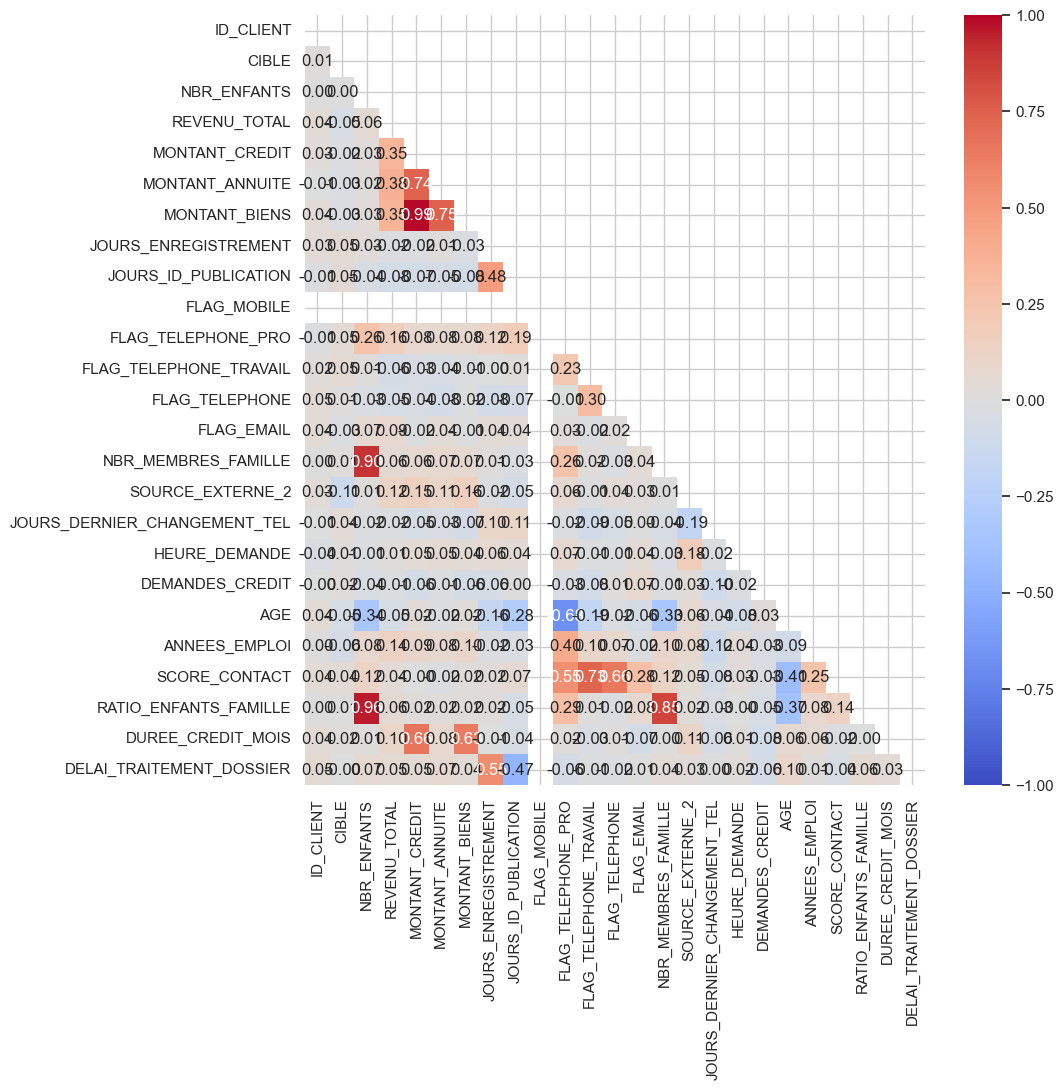

In [56]:
fig = plt.subplots(1, 1, figsize=(10, 10))
corr = numeric_columns.sample(frac=0.1).corr()
mask = np.triu(corr)
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, mask=mask, fmt=".2f")

In [57]:
df['GENRE_M'].unique()

array([0, 1])